2.

In [83]:
from scipy.stats import bernoulli
from scipy.stats import norm
from scipy.stats import uniform
#2i
def pvaluesi(n, pi):
    theta = bernoulli.rvs(1 - pi, size = n)
    pval = []
    for x in theta:
        if x == 0:
            pval.append(uniform.rvs(0,1))
        elif x == 1:
            pval.append(norm.cdf(-norm.rvs(3, 1)))
    return pval, theta

In [84]:
#2ii
def pvaluesii(n, pi):
    theta = []
    pval = []
    for i in range(1, int((pi*n)+1)):
        theta.append(0)
        pval.append(uniform.rvs(0,1))
    for x in range(int((pi*n)+1), n+1):
        theta.append(1)
        pval.append(norm.cdf(-norm.rvs(3, 1)))  
    return pval, theta

In [85]:
#2iii
def pvaluesiii(n, pi):
    theta = []
    pval = []
    for i in range(1, int((n-(pi*n))+1)):
        theta.append(1)
        pval.append(norm.cdf(-norm.rvs(3, 1)))
    for x in range(int((n-(pi*n))+1), n+1):
        theta.append(0)
        pval.append(uniform.rvs(0,1))
    return pval, theta

In [86]:
import math
def LORD(stream,alpha):
    # Inputs: stream - array of p-values, alpha - target FDR level
    # Output: array of indices k such that the k-th p-value corresponds to a discovery
    
    gamma = lambda t: 6/(math.pi*t)**2
    w_0 = alpha/2
    n = len(stream)
    rejections = []
    alpha_t = gamma(1)*w_0
    for t in range(1,n+1):
        # Offset by one since indexing by 1 for t
        p_t = stream[t-1] 
        
        if p_t < alpha_t:
            rejections.append(t)

        next_alpha_t = gamma(t+1)*w_0 + alpha*sum([gamma(t+1-rej) for rej in rejections])
        # Check if tau_1 exists
        if len(rejections)>0:
            next_alpha_t -= gamma(t+1-rejections[0])*w_0
        

        # Update alpha
        alpha_t = next_alpha_t
    # Shift rejections since the rejections are 1-indexed
    shifted_rej = [rej-1 for rej in rejections]
    return shifted_rej

In [87]:
def sens_fdp(lord_index, true_values):
    TP = 0
    FP = 0
    FN = 0
    fdp = 0
    sensitivity = 0
    if len(lord_index) > 0:
        for x in lord_index:
            if true_values[x] == 1:
                TP += 1
            if true_values[x] == 0:
                FP += 1
        fdp = FP/(TP+FP)
    else:
        fdp = 0
    no_discovry = [x for x in range(0, len(true_values)) if x not in lord_index]
    
    for x in no_discovry:
        if true_values[x] == 1:
            FN += 1
    sensitivity = TP/(TP+FN)
    return fdp, sensitivity

            

2a.

In [88]:
#Question a
import numpy as np

p = [0.1, 0.3, 0.5, 0.7, 0.9]
n = 1000
alpha = 0.05


fdr_est = []
sen_est = []
#for i
for x in p:
    fdps = []
    sensitivity = []
    for i in range(0,100):
        pi = pvaluesi(n, x)
        true_values = pi[1]
        p_values = pi[0]
        run_lord = LORD(p_values, alpha)
        stat = sens_fdp(run_lord, true_values)
        fdps.append(stat[0])
        sensitivity.append(stat[1])
    fdr_est.append(np.mean(fdps))
    sen_est.append(np.mean(sensitivity))
        
fdr_est, sen_est    


([0.005204354204943734,
  0.01392041331009957,
  0.02394742582671029,
  0.034273876500595615,
  0.0305656585628976],
 [0.8818663079864788,
  0.8323027360672078,
  0.7575618731728743,
  0.5944330724891812,
  0.17266110829691356])

In [89]:
#for ii

fdr_est2 = []
sen_est2 = []
for x in p:
    fdps2 = []
    sensitivity2 = []
    for i in range(0,100):
        pi = pvaluesii(n, x)
        true_values = pi[1]
        p_values = pi[0]
        run_lord = LORD(p_values, alpha)
        stat = sens_fdp(run_lord, true_values)
        fdps2.append(stat[0])
        sensitivity2.append(stat[1])
    fdr_est2.append(np.mean(fdps2))
    sen_est2.append(np.mean(sensitivity2))
fdr_est2, sen_est2  

([1.2330456226880395e-05,
  1.6420361247947455e-05,
  5.979921431689218e-05,
  0.0,
  0.00032407407407407406],
 [0.881188888888889, 0.8057714285714285, 0.7114, 0.4979999999999999, 0.2429])

In [90]:
#for iii

fdr_est3 = []
sen_est3 = []
for x in p:
    fdps3 = []
    sensitivity3 = []
    for i in range(0,100):
        pi = pvaluesiii(n, x)
        true_values = pi[1]
        p_values = pi[0]
        run_lord = LORD(p_values, alpha)
        stat = sens_fdp(run_lord, true_values)
        fdps3.append(stat[0])
        sensitivity3.append(stat[1])
    fdr_est3.append(np.mean(fdps3))
    sen_est3.append(np.mean(sensitivity3))
fdr_est3, sen_est3 

([0.00022284248623759178,
  0.0003476135696335631,
  0.00037896214833436914,
  0.0006719571454230792,
  0.001867658749172538],
 [0.8953666666666666,
  0.8978714285714287,
  0.8964400000000002,
  0.8945333333333332,
  0.8894])

In [91]:
import pandas as pd
d = {'pi0': [0.1, 0.3, 0.5, 0.7, 0.9], 'fdr_i': fdr_est, 'sensitivity_i': sen_est,
    'fdr_ii': fdr_est2, 'sensitivity_ii': sen_est2, 'fdr_iii': fdr_est3, 'sensitivity_iii': sen_est3}
df = pd.DataFrame(data=d)
df

,pi0,fdr_i,sensitivity_i,fdr_ii,sensitivity_ii,fdr_iii,sensitivity_iii
0,0.1,0.005204,0.881866,0.000012,0.881189,0.000223,0.895367
1,0.3,0.013920,0.832303,0.000016,0.805771,0.000348,0.897871
2,0.5,0.023947,0.757562,0.000060,0.711400,0.000379,0.896440
3,0.7,0.034274,0.594433,0.000000,0.498000,0.000672,0.894533
4,0.9,0.030566,0.172661,0.000324,0.242900,0.001868,0.889400


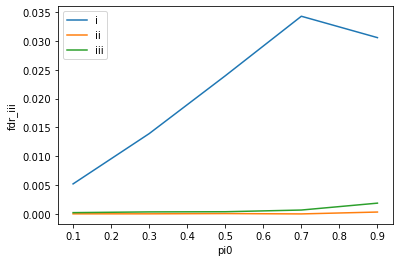

In [92]:
#FDR plot against Pi0 Values
import seaborn as sns
sns.lineplot(x = "pi0", y = "fdr_i", data = df, label = "i")
sns.lineplot(x = "pi0", y = "fdr_ii", data = df, label = "ii")
sns.lineplot(x = "pi0", y = "fdr_iii", data = df, label = "iii");


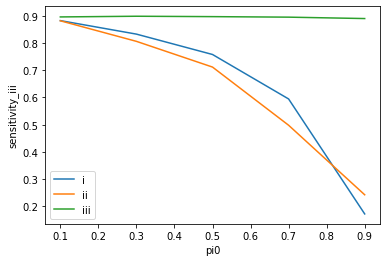

In [93]:
#Sensitivity plot against Pi0 Values
sns.lineplot(x = "pi0", y = "sensitivity_i", data = df, label = "i")
sns.lineplot(x = "pi0", y = "sensitivity_ii", data = df, label = "ii")
sns.lineplot(x = "pi0", y = "sensitivity_iii", data = df, label = "iii");

LORD achieves the highest sensitivity in scenario iii. This makes sense because in LORD, the ordering of the p-values matters. We are getting lower p-values earlier, allowing us to make more discoveries, and gain alpha wealth (which in turn also makes it easier to make a discovery). All of this considered, we are making more discoviries, increasing the amount of true positives and thus sensitivity. Sensitivity does not take into acccount the number of FP, but FDP does.

2b.

In [94]:
def benjamini_hochberg(p_values, alpha):
    """
    Returns decisions on p-values using Benjamini-Hochberg.
    
    Inputs:
        p_values: array of p-values
        alpha: desired FDR (FDR = E[# false positives / # positives])
    
    Returns:
        decisions: binary array of same length as p-values, where `decisions[i]` is 1
        if `p_values[i]` is deemed significant, and 0 otherwise
    """

    n = len(p_values)
    k = 0
    sorted_p = np.sort(p_values)
    
    for i in reversed(range(n)):
        if sorted_p[i] <= (i + 1) * (alpha / n):
            break;

    decisions = p_values <= sorted_p[i]
    return decisions
    


In [95]:
def sens_fdp_bh(lord_index, true_values):
    TP = 0
    FP = 0
    FN = 0
    fdp = 0
    sensitivity = 0
    if sum(lord_index) > 0:
        for x in range(len(lord_index)):
            if (true_values[x] == 1) and (lord_index[x] == 1):
                TP += 1
            if (true_values[x] == 0) and (lord_index[x] == 1):
                FP += 1
        fdp = FP/(TP+FP)
    else:
        fdp = 0    
    for x in range(len(lord_index)):
        if (true_values[x] == 1) and (lord_index[x] == 0):
            FN += 1
    sensitivity = TP/(TP+FN)
    return fdp, sensitivity


In [96]:
fdr_estBH = []
sen_estBH = []
#for i
for x in p:
    fdpsBH = []
    sensitivityBH = []
    for i in range(0,100):
        pi = pvaluesi(n, x)
        true_values = pi[1]
        p_values = pi[0]
        run_lord = benjamini_hochberg(p_values, alpha)
        stat = sens_fdp_bh(run_lord, true_values)
        fdpsBH.append(stat[0])
        sensitivityBH.append(stat[1])
    fdr_estBH.append(np.mean(fdpsBH))
    sen_estBH.append(np.mean(sensitivityBH))
        
fdr_estBH, sen_estBH    


([0.005127572401572317,
  0.014613208472248132,
  0.025054390761398686,
  0.035903232342611884,
  0.04091724364642823],
 [0.8936329625692965,
  0.872249247008029,
  0.8337120688349132,
  0.7727191138973817,
  0.6071833921957291])

In [97]:
#for ii

fdr_est2BH = []
sen_est2BH = []
for x in p:
    fdps2BH = []
    sensitivity2BH = []
    for i in range(0,100):
        pi = pvaluesii(n, x)
        true_values = pi[1]
        p_values = pi[0]
        run_lord = benjamini_hochberg(p_values, alpha)
        stat = sens_fdp_bh(run_lord, true_values)
        fdps2BH.append(stat[0])
        sensitivity2BH.append(stat[1])
    fdr_est2BH.append(np.mean(fdps2BH))
    sen_est2BH.append(np.mean(sensitivity2BH))
fdr_est2BH, sen_est2BH

([0.004911392067062572,
  0.01533209147057792,
  0.02416938075982275,
  0.03434805647496606,
  0.04375798561644286],
 [0.8969777777777779,
  0.8716142857142857,
  0.8385199999999999,
  0.7668666666666667,
  0.5961])

In [98]:
#for iii

fdr_est3BH = []
sen_est3BH = []
for x in p:
    fdps3BH = []
    sensitivity3BH = []
    for i in range(0,100):
        pi = pvaluesiii(n, x)
        true_values = pi[1]
        p_values = pi[0]
        run_lord = benjamini_hochberg(p_values, alpha)
        stat = sens_fdp_bh(run_lord, true_values)
        fdps3BH.append(stat[0])
        sensitivity3BH.append(stat[1])
    fdr_est3BH.append(np.mean(fdps3BH))
    sen_est3BH.append(np.mean(sensitivity3BH))
fdr_est3BH, sen_est3BH

([0.005170103386712928,
  0.014424508738314001,
  0.024663866022470032,
  0.03514585534000918,
  0.0434140386943077],
 [0.8984666666666666,
  0.8707714285714284,
  0.8374599999999998,
  0.7745666666666666,
  0.6098])

In [99]:
d2 = {'pi0': [0.1, 0.3, 0.5, 0.7, 0.9], 'fdr_i': fdr_estBH, 'sensitivity_i': sen_estBH,
    'fdr_ii': fdr_est2BH, 'sensitivity_ii': sen_est2BH, 'fdr_iii': fdr_est3BH, 'sensitivity_iii': sen_est3BH}
df2 = pd.DataFrame(data=d2)
df2

,pi0,fdr_i,sensitivity_i,fdr_ii,sensitivity_ii,fdr_iii,sensitivity_iii
0,0.1,0.005128,0.893633,0.004911,0.896978,0.005170,0.898467
1,0.3,0.014613,0.872249,0.015332,0.871614,0.014425,0.870771
2,0.5,0.025054,0.833712,0.024169,0.838520,0.024664,0.837460
3,0.7,0.035903,0.772719,0.034348,0.766867,0.035146,0.774567
4,0.9,0.040917,0.607183,0.043758,0.596100,0.043414,0.609800


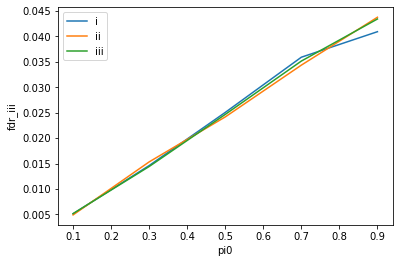

In [100]:
#FDR plot against Pi0 Values
import seaborn as sns
sns.lineplot(x = "pi0", y = "fdr_i", data = df2, label = "i")
sns.lineplot(x = "pi0", y = "fdr_ii", data = df2, label = "ii")
sns.lineplot(x = "pi0", y = "fdr_iii", data = df2, label = "iii");

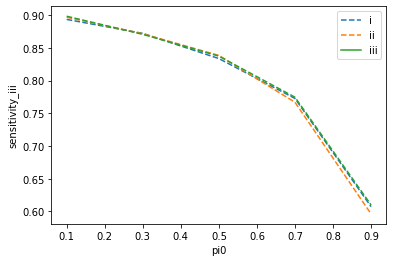

In [101]:
#Sensitivity plot against Pi0 Values
ax = sns.lineplot(x = "pi0", y = "sensitivity_i", data = df2, label = "i")
ax.lines[0].set_linestyle("--");
ax = sns.lineplot(x = "pi0", y = "sensitivity_ii", data = df2, label = "ii")
ax.lines[1].set_linestyle("--");
ax=sns.lineplot(x = "pi0", y = "sensitivity_iii", data = df2, label = "iii")
ax.lines[2].set_linestyle("--");

There is less variation between the sensitivity curves in the BH procedure compared to LORD. In LORD, the order of the curves is setting ii(lowest sensitivity), i, iii (highest sensitivity), while the sensitivity curve for all three settings seem the same in BH procedure (there is some noise so it's slightly different). The sensitivity of setting iii is slightly higher than the sensitivity of setting ii, although they are very close. I assume the reason for this is because BH takes in a set of p-values and then sorts them before making decisions; because the p-values generated from all three scenarios are the same, the resulting sensitivities for the three settings should be relatively the same as well. LORD, on the other hand, takes in an ordered set of p-values and uses this ordering for decision-making so it's more varied for each setting.

3.

In [105]:
police = pd.read_csv("policez.csv")
police.head()

,Unnamed: 0,x
0,1,2.411365
1,2,0.160788
2,3,-0.852171
3,4,0.151016
4,5,1.836084


3a.

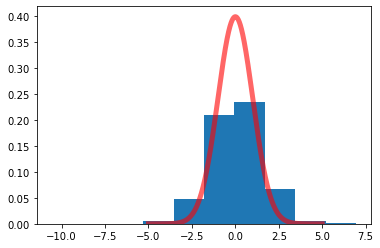

In [106]:
from scipy.stats import norm
import scipy.stats as ss

import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1)

x = np.linspace(-5, 5, 5000)
mu = 0
sigma = 1

ax.plot(x, ss.norm.pdf(x, mu, sigma),
       'r-', lw=5, alpha=0.6, label='norm pdf')
ax.hist(police['x'], density=True, histtype='stepfilled')
plt.show()


3a. It is not the greatest fit: the histogram is more spread out than the line plot of the pdf, thus the curve is higher and narrower than the histogram.

In [107]:
p_vals = []
for x in police['x']:
    p_vals.append(norm.cdf(-x, 0, 1))
p = len(p_vals)

In [108]:
d3 = {'x_vals': range(1, p+1)}
df3 = pd.DataFrame(data=d3)
df3['yvals'] = df3['x_vals']*(0.2/p)
df3['pvals'] = sorted(p_vals)
df3.head()

,x_vals,yvals,pvals
0,1,0.000073,1.794564e-12
1,2,0.000146,3.853529e-11
2,3,0.000218,5.881356e-09
3,4,0.000291,4.150348e-08
4,5,0.000364,4.023405e-07


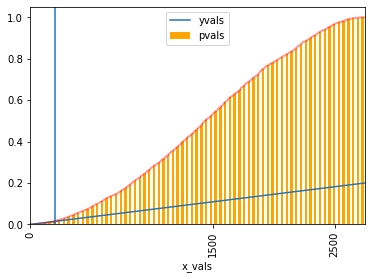

In [109]:
import matplotlib.pyplot as plt

ax = df3[['x_vals', 'yvals']].plot(x='x_vals')
df3[['x_vals', 'pvals']].plot(x='x_vals', kind='bar',ax=ax, color = 'orange')
ax.axvline(x=201)
ax.set_xticks([0, 1500, 2500])
ax.set_xticklabels([0, 1500, 2500])
ax.plot(df3['x_vals'], df3['pvals'],
       'r-', lw=2, alpha=0.4, label='pval pdf')
plt.show()

In [110]:
sum(benjamini_hochberg(p_vals, 0.2))

201

b) I made 201 discoveries.

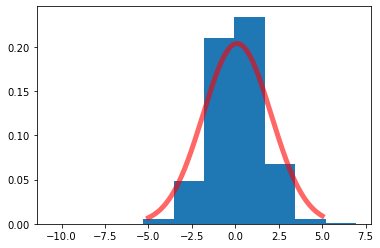

In [111]:
#3c
x = np.linspace(-5, 5, 5000)
mu = 0.1
sigma = 1.4**2
fig, ax = plt.subplots(1, 1)
ax.plot(x, ss.norm.pdf(x, mu, sigma),
       'r-', lw=5, alpha=0.6, label='norm pdf')
ax.hist(police['x'], density=True, histtype='stepfilled')
plt.show()

This pdf is much more fitted on the histogram.

In [112]:
p_vals2 = []
for y in police['x']:
    p_vals2.append(1-norm.cdf(-y, 0.1, 1.4))
p = len(p_vals2)
sm = sum(benjamini_hochberg(p_vals2, 0.2))
sm

5

In 3c, I made 5 discoveries.

In [113]:
df3 = {'x_vals': range(1, p+1)}
df3 = pd.DataFrame(data=df3)
df3['yvals'] = df3['x_vals']*(0.2/p)
df3['pvals'] = sorted(p_vals2)


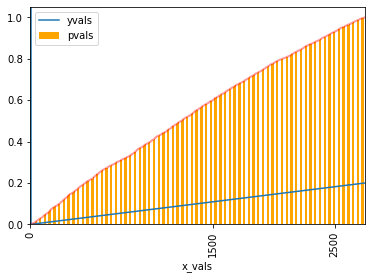

In [114]:
ax = df3[['x_vals', 'yvals']].plot(x='x_vals')
df3[['x_vals', 'pvals']].plot(x='x_vals', kind='bar',ax=ax, color = 'orange')
ax.axvline(x=sm)
ax.set_xticks([0, 1500, 2500])
ax.set_xticklabels([0, 1500, 2500])
ax.plot(df3['x_vals'], df3['pvals'],
       'r-', lw=2, alpha=0.4, label='pval pdf')
plt.show()

3D. By replacing the theoretical null, we are assuming that the real distribution of z does not follow N(0,1) because when we use N(0,1), we assume that the distribution of z follows N(0,1) (aka centered at 0) after many repetition of samples. We are now deciding that the actual distribution of z more cloesly follows N(0.10, 1.4^2) by making the assumption that the data has a lot of null cases and thus the data can show the null distribution itself. The limitation of using the theoretical null is that the theoretical null doesn't fit the z-scores of this dataset that well so the p-values will tend to be smaller, allowing for more discoveries, and more false positive discoveries. 